In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = (256,256)
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])
    print(label_batch.numpy())

tf.Tensor(
[[[180. 184. 195.]
  [172. 176. 187.]
  [188. 192. 203.]
  ...
  [132. 134. 147.]
  [137. 139. 152.]
  [142. 144. 157.]]

 [[170. 174. 185.]
  [179. 183. 194.]
  [186. 190. 201.]
  ...
  [136. 138. 151.]
  [139. 141. 154.]
  [142. 144. 157.]]

 [[208. 212. 223.]
  [204. 208. 219.]
  [175. 179. 190.]
  ...
  [143. 145. 158.]
  [144. 146. 159.]
  [144. 146. 159.]]

 ...

 [[157. 159. 171.]
  [160. 162. 174.]
  [160. 162. 174.]
  ...
  [157. 155. 166.]
  [154. 152. 163.]
  [147. 145. 156.]]

 [[156. 158. 170.]
  [158. 160. 172.]
  [157. 159. 171.]
  ...
  [133. 131. 142.]
  [140. 138. 149.]
  [131. 129. 140.]]

 [[152. 154. 166.]
  [154. 156. 168.]
  [153. 155. 167.]
  ...
  [126. 124. 135.]
  [138. 136. 147.]
  [145. 143. 154.]]], shape=(256, 256, 3), dtype=float32)
[0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 2 0 0 0 0 0 1 2 1 0 1 1 1]


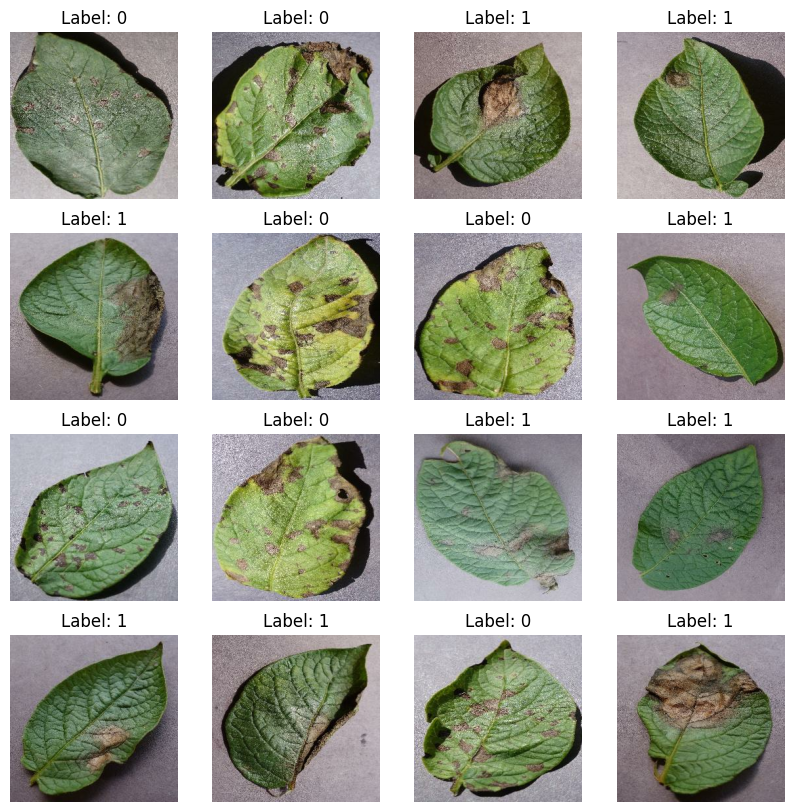

In [7]:

for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10, 10))
    num_images = min(len(image_batch), 16)  # Display at most 16 images
    for i in range(num_images):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(f"Label: {label_batch[i]}")
        plt.axis("off")
    plt.show()


In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
test_ds = dataset.skip(54)
print(len(test_ds))

14


In [10]:
val_ds = test_ds.take(6)
len(test_ds)

14

In [11]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
      
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = ds_size - train_size - val_size

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)
    
    return train_ds, val_ds, test_ds


In [12]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resize(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/256)
])

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'

In [ ]:
tf.keras.Sequentual([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation ='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3,3), activation ='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3,3), activation ='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3,3), activation ='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3,3), activation ='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3,3), activation ='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)

In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

In [ ]:
scores = model.evaluation(test_ds)

In [ ]:
scores
history.params

In [ ]:
acc = history.history['accuaracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training accuaracy')
plt.plot(range(EPOCHS), val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.show()

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image actual label:", class_first_label)
    
    batch_prediction = model.predict(images_batch)
    print(np.argmax(batch_prediction[0]))